<a href="https://colab.research.google.com/github/muajnstu/DSK-Chain-to-predict-diabeties-/blob/main/DBSCAN_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applying DBSCAN Clustering technique to cleaned data

Cluster label distribution (−1 = noise): Counter({np.int64(-1): 4212, np.int64(0): 1100, np.int64(1): 970, np.int64(12): 30, np.int64(11): 30, np.int64(6): 22, np.int64(17): 21, np.int64(7): 17, np.int64(4): 16, np.int64(8): 16, np.int64(20): 16, np.int64(13): 16, np.int64(2): 15, np.int64(16): 15, np.int64(18): 12, np.int64(25): 11, np.int64(14): 11, np.int64(21): 11, np.int64(15): 11, np.int64(24): 10, np.int64(5): 10, np.int64(9): 10, np.int64(10): 10, np.int64(19): 10, np.int64(26): 10, np.int64(22): 10, np.int64(3): 7, np.int64(23): 7})
Silhouette Score: -0.427


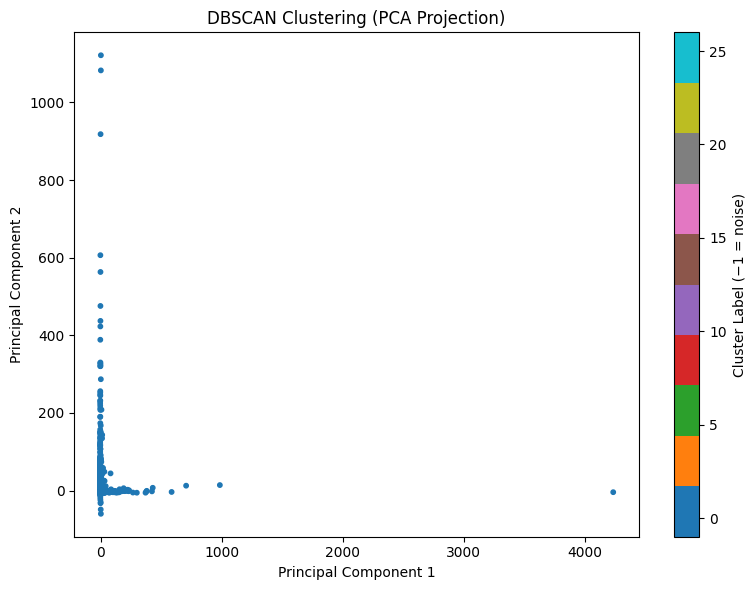

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from collections import Counter

url = "https://raw.githubusercontent.com/muajnstu/Comparative-Analysis-of-K-Nearest-Neighbors-Variants-for-Diabetes-Prediction-Using-Administrative-He/refs/heads/main/update_dataframe%20(1).csv"
df3 = pd.read_csv(url)

X = df3.drop("Outcome", axis=1).values

# Scale features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Run DBSCAN clustering algorithm
db = DBSCAN(eps=0.6, min_samples=10, n_jobs=-1)
labels = db.fit_predict(X_scaled)

# label distribution
label_counts = Counter(labels)
print("Cluster label distribution (−1 = noise):", label_counts)

# Silhouette score
core_clusters = [l for l in set(labels) if l != -1]
if len(core_clusters) > 1:
    sil = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {sil:.3f}")
else:
    print("Not enough clusters for silhouette score.")

#PCA Visualization of clusters
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=10)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster Label (−1 = noise)")
plt.tight_layout()
plt.show()


In [ ]:
# Add DBSCAN labels to the original DataFrame
df3['DBSCAN_Cluster'] = labels


In [ ]:
df3.head()

,AIDS/HIV,Alcohol abuse,Blood loss anaemia,Cardiac arrhythmias,Chronic pulmonary disease,Coagulopathy,Congestive heart failure,Deficiency anaemia,Depression,Diabetes (complicated),...,Other neurological disorders,Paralysis,Peptic ulcer disease excluding bleeding,Peripheral vascular disorders,Psychoses,Pulmonary circulation,Renal failure,Rheumatoid arthritis,Outcome,DBSCAN_Cluster
0,1,86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,66,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,1
2,1,89,0,0,0,1,0,0,52,0,...,0,0,0,0,0,0,0,0,1,-1
3,1,69,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
4,0,81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
df3['DBSCAN_Cluster'].value_counts()

,count
DBSCAN_Cluster,
-1,4212
0,1100
1,970
12,30
11,30
6,22
17,21
7,17
8,16


In [ ]:
from google.colab import files
df3.to_csv('df3_with_clusters.csv', index=False)
files.download('df3_with_clusters.csv')
print("df3 with DBSCAN clusters downloaded as 'df3_with_clusters.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

df3 with DBSCAN clusters downloaded as 'df3_with_clusters.csv'
